                                                                        Simple Linear Regression 

Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
dataset = pd.read_csv("Salary_Data.csv")

In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

The SimpleImputer in scikit-learn is a handy tool for handling missing data in datasets. It automatically fills in missing values using strategies like mean, median, most frequent, or a constant value. By fitting to the dataset and transforming it, the SimpleImputer ensures that missing values are replaced with meaningful substitutes, enabling smoother data analysis and modeling processes.

This can be done when it is neccessary. Analaysis of dataset is needed before getting into action.  

In [11]:
"""from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(X[:,:1])
X[:,:1]=imputer.transform(X[:,:1])"""

This code snippet uses scikit-learn's ColumnTransformer along with OneHotEncoder to perform one-hot encoding on categorical features within a dataset. By specifying the transformation within the ColumnTransformer and using the fit_transform() method, it seamlessly preprocesses the data, ensuring compatibility with machine learning algorithms that require numerical input.

In [12]:
"""from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")
X=np.array(ct.fit_transform(X))"""

In summary, this code preprocesses the categorical target variable y by encoding it into numerical labels using LabelEncoder, making it suitable for use with machine learning algorithms that require numerical input.

In [19]:
"""from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)"""

Splitting of data


In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X, y, test_size=0.2, random_state=0)


Standardization scales data to have a mean of 0 and a standard deviation of 1, useful when features have different units or scales.
Normalization scales data to a range between 0 and 1, useful when features have different ranges or when algorithms rely on distance measures.

You can choose as per your requirement but standardization gives a good result compared to normalization.

In [5]:
"""from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)"""

Simple Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

Predicting the Test set result

In [7]:
y_pred = regressor.predict(X_test)

Visualization of training result

Marking red color as original result and blue as predicted result

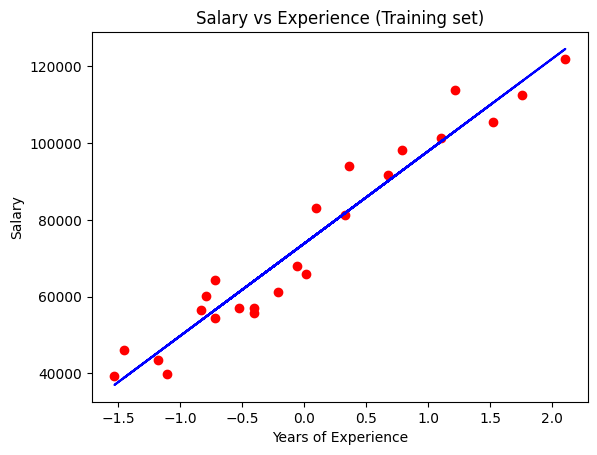

In [8]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualization of test result

Marking red color as original result and blue as predicted result

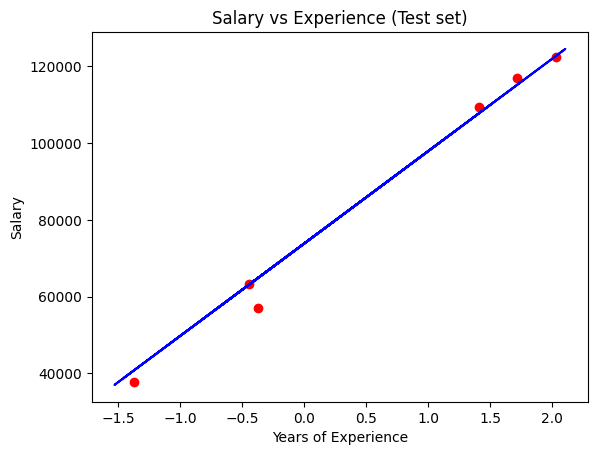

In [9]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Metrix Score

In [10]:
from sklearn.metrics import mean_squared_error, r2_score


y_true = y_test  # Actual values
y_pred = regressor.predict(X_test)  # Predicted values

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 12823412.298126562
R-squared: 0.988169515729126
